In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, Input
from keras.optimizers import SGD
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.preprocessing.image import img_to_array
import keras.utils.io_utils as o
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception
from keras.applications import VGG16, VGG19
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import warnings
warnings.filterwarnings('ignore')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
models_filename = 'v8_vgg16_model_1.h5'
image_dir = '/kaggle/input/testing'
image_size = (224, 224)
batch_size = 16
epochs = 80

In [4]:
# 5gb of images won't fit in my memory. use datagenerator to go across all images.
train_datagen = ImageDataGenerator(rescale = 1./255,horizontal_flip = False,fill_mode = "nearest",zoom_range = 0,
                                   width_shift_range = 0,height_shift_range=0,rotation_range=0)

train_generator = train_datagen.flow_from_directory(image_dir,target_size = (image_size[0], image_size[1]),
                                                    batch_size = batch_size, class_mode = "categorical")

num_of_classes = len(train_generator.class_indices)

Found 60 images belonging to 1 classes.


In [5]:
model = VGG16(weights='imagenet', include_top=True)


553467096/553467096 [==============================] - 2s 0us/step


In [6]:
#Get features (4096 dim)

feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
#feat_extractor = Model(inputs=model.input, outputs=model.output)  # Use model.output to get features from GAP layer

train_generator2 = train_datagen.flow_from_directory('/kaggle/input/testing/', target_size = (image_size[0], image_size[1]),
                                                    batch_size = 1, class_mode = "categorical", shuffle= False)

features = []
file_names = train_generator2.filenames
#print(file_names)
f = open('Image_embeddings.txt', 'a', encoding='utf-8')
for n in range(len(file_names)):
    next_img = train_generator2.next()
    img, classifier = (next_img[0][0],next_img[1][0])
    #if(n>3728):
    print(n)
    feat = feat_extractor.predict(np.asarray([img]))[0]
    #features.append(feat)
    #print(feat[:10])
    result = file_names[n] + ", " + str(list(feat)) + "\n"
    f.write(result)

f.close()

Found 60 images belonging to 1 classes.
0
1/1 [==============================] - 5s 5s/step
1
1/1 [==============================] - 0s 18ms/step
2
1/1 [==============================] - 0s 19ms/step
3
1/1 [==============================] - 0s 20ms/step
4
1/1 [==============================] - 0s 18ms/step
5
1/1 [==============================] - 0s 20ms/step
6
1/1 [==============================] - 0s 20ms/step
7
1/1 [==============================] - 0s 18ms/step
8
1/1 [==============================] - 0s 19ms/step
9
1/1 [==============================] - 0s 18ms/step
10
1/1 [==============================] - 0s 18ms/step
11
1/1 [==============================] - 0s 18ms/step
12
1/1 [==============================] - 0s 18ms/step
13
1/1 [==============================] - 0s 19ms/step
14
1/1 [==============================] - 0s 19ms/step
15
1/1 [==============================] - 0s 18ms/step
16
1/1 [==============================] - 0s 18ms/step
17
1/1 [=============================

In [7]:
#Use 2 dictionaries for text and nlp and create a excel sheet for training data...
import ast
f = open('Image_embeddings.txt', encoding='utf-8')
lines = f.readlines()
image_emdb = {}
name = lines[0].split(',')[0]
#print(type(lines[0][len(name)+2:]))
#print(ast.literal_eval(lines[0][len(name)+2:]))
for line in lines:
    name = line.split(',')[0]
    print(name)
    image_emdb[name] = ast.literal_eval(line[len(name)+2:])

dumplings/0.jpg
dumplings/1.jpg
dumplings/10.jpg
dumplings/11.jpg
dumplings/12.jpg
dumplings/13.jpg
dumplings/14.jpg
dumplings/15.jpg
dumplings/16.jpg
dumplings/17.jpg
dumplings/18.jpg
dumplings/19.jpg
dumplings/2.jpg
dumplings/20.jpg
dumplings/21.jpg
dumplings/22.jpg
dumplings/23.jpg
dumplings/24.jpg
dumplings/25.jpg
dumplings/26.jpg
dumplings/27.jpg
dumplings/28.jpg
dumplings/29.jpg
dumplings/3.jpg
dumplings/30.jpg
dumplings/31.jpg
dumplings/32.jpg
dumplings/33.jpg
dumplings/34.jpg
dumplings/35.jpg
dumplings/36.jpg
dumplings/37.jpg
dumplings/38.jpg
dumplings/39.jpg
dumplings/4.jpg
dumplings/40.jpg
dumplings/41.jpg
dumplings/42.jpg
dumplings/43.jpg
dumplings/44.jpg
dumplings/45.jpg
dumplings/46.jpg
dumplings/47.jpg
dumplings/48.jpg
dumplings/49.jpg
dumplings/5.jpg
dumplings/50.jpg
dumplings/51.jpg
dumplings/52.jpg
dumplings/53.jpg
dumplings/54.jpg
dumplings/55.jpg
dumplings/56.jpg
dumplings/57.jpg
dumplings/58.jpg
dumplings/59.jpg
dumplings/6.jpg
dumplings/7.jpg
dumplings/8.jpg
dumpli

In [8]:
#Write dict to a json
import json
with open('img_embd.json', 'w') as fp:
    json.dump(image_emdb, fp)


In [9]:
image_emdb[list(image_emdb.keys())[0]]

[34.676327,
 0.0,
 0.0,
 133.47655,
 0.0,
 0.0,
 20.422901,
 0.0,
 0.0,
 237.00745,
 0.0,
 0.0,
 0.0,
 0.0,
 3.4400477,
 0.0,
 0.0,
 235.20358,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 16.182795,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 145.89119,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 159.11821,
 0.0,
 90.52077,
 0.0,
 85.869316,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 123.37031,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 22.827038,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 8.399733,
 0.0,
 0.0,
 0.0,
 69.670784,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 179.459,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 27.778505,
 0.0,
 0.0,
 0.0,
 14.45708,
 0.0,
 61.085056,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 126.048386,
 270.56226,
 0.0,
 0.0,
 0.0,
 0.0,
 0

In [10]:
#Open ingredients.txt, check average and maximum number of words for each
import gensim
f = open('/kaggle/input/ingredients-test/dumplings.txt', 'r', encoding='utf-8')
ingr = f.readlines()
#w2v = gensim.models.KeyedVectors.load_word2vec_format('../GoogleNews-vectors-negative300.bin', binary=True)

In [11]:
w2v = gensim.models.KeyedVectors.load_word2vec_format('/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin', binary=True)

In [12]:
c=[]
d=[]
for i in ingr:
    c.append(len(i.strip('\n').split(',')[1:]))
    e=''
    for j in i.strip('\n').split(',')[1:]:
        e += ','
        e += ','.join(j.split())
        #e.append()
    d.append(e.split(','))

print(d[1])
print('Average ingr: ', sum(c)/len(ingr))
print('Maximum ingr: ', max(c))
print('Minimum ingr: ', min(c))
print(ingr[c.index(max(c))].strip('\n').split(',')[1:])

c=[]
for i in d:
    c.append(len(i))

print('Average word: ', sum(c)/len(ingr))
print('Maximum word: ', max(c))
print('Minimum word: ', min(c))

print(ingr[c.index(max(c))].strip('\n').split(',')[1:])
#ingr[1].strip('\n').split(',')[1:]
#import statistics
#print(sorted(c)[:1000])

['', 'sugar', 'butter', 'mountain', 'dew', 'cinnamon', 'apples', 'roll', 'dough']
Average ingr:  9.45
Maximum ingr:  19
Minimum ingr:  3
['potatoes', 'tomato', 'poultry seasoning', 'onions', 'bell pepper', 'parsley', 'flour', 'buttermilk baking', 'salt', 'chicken broth', 'water', 'milk', 'garlic powder', 'chicken', 'celery', 'carrots', 'chicken bouillon', 'pepper', 'dried sage']
Average word:  13.183333333333334
Maximum word:  27
Minimum word:  4
['potatoes', 'tomato', 'poultry seasoning', 'onions', 'bell pepper', 'parsley', 'flour', 'buttermilk baking', 'salt', 'chicken broth', 'water', 'milk', 'garlic powder', 'chicken', 'celery', 'carrots', 'chicken bouillon', 'pepper', 'dried sage']


In [13]:
ingr_length = 22

ingr_embd = {}
len(d)
len(ingr)
#ingr[0].split(',')[0]
#list(image_emdb.keys())[0]
for i in range(len(d)):
    #print(i)
    l = []
    for word in d[i][1:ingr_length]:
        if(word not in w2v):
            print(word)
            if(l):
                l.append(l[-1])
            #else:
            #    l.append(w2v[])
        else:
            l.append(list(w2v[word]))
    if(len(l)<ingr_length):
        #l.extend(np.array([[0]*300]*(23-len(l))))
        l.extend([[0]*300]*(ingr_length-len(l)))
    ingr_embd[ingr[i].split(',')[0]] = l


bisquick
pillsbury


In [14]:
#Write dict to a json
import json
with open('ingr_embd.json', 'w') as fp:
    json.dump(str(ingr_embd), fp)


In [15]:
with open('ingr_embd.json') as f:
    sample = json.load(f)

In [16]:
training_data = []
training_lable = []
training_names = []
for i in image_emdb.keys():
    print(i)
    training_names.append(i)
    x=i.replace("/", "")
    if(x in ingr_embd.keys()):
        training_data.append(ingr_embd[x])
        training_lable.append(image_emdb[i])
        training_names.append(x)
    else:
        print(i)

dumplings/0.jpg
dumplings/1.jpg
dumplings/10.jpg
dumplings/11.jpg
dumplings/12.jpg
dumplings/13.jpg
dumplings/14.jpg
dumplings/15.jpg
dumplings/16.jpg
dumplings/17.jpg
dumplings/18.jpg
dumplings/19.jpg
dumplings/2.jpg
dumplings/20.jpg
dumplings/21.jpg
dumplings/22.jpg
dumplings/23.jpg
dumplings/24.jpg
dumplings/25.jpg
dumplings/26.jpg
dumplings/27.jpg
dumplings/28.jpg
dumplings/29.jpg
dumplings/3.jpg
dumplings/30.jpg
dumplings/31.jpg
dumplings/32.jpg
dumplings/33.jpg
dumplings/34.jpg
dumplings/35.jpg
dumplings/36.jpg
dumplings/37.jpg
dumplings/38.jpg
dumplings/39.jpg
dumplings/4.jpg
dumplings/40.jpg
dumplings/41.jpg
dumplings/42.jpg
dumplings/43.jpg
dumplings/44.jpg
dumplings/45.jpg
dumplings/46.jpg
dumplings/47.jpg
dumplings/48.jpg
dumplings/49.jpg
dumplings/5.jpg
dumplings/50.jpg
dumplings/51.jpg
dumplings/52.jpg
dumplings/53.jpg
dumplings/54.jpg
dumplings/55.jpg
dumplings/56.jpg
dumplings/57.jpg
dumplings/58.jpg
dumplings/59.jpg
dumplings/6.jpg
dumplings/7.jpg
dumplings/8.jpg
dumpli

In [17]:
image_emdb['dumplings/0.jpg']
len(ingr_embd['dumplings0.jpg'][0])

300

In [21]:
#Run training
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import gensim
import numpy as np

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(22,300,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
tf.keras.layers.Dense(4096, activation="relu", name="dense")
])

model.compile(optimizer=RMSprop(lr=0.001), loss='mse') #,metrics=['acc']


In [22]:
training_data = np.array(training_data)
training_data = training_data.reshape([training_data.shape[0], training_data.shape[1], training_data.shape[2],1])
print(training_data.shape)
training_lable = np.array(training_lable)
print(training_lable.shape)

(60, 22, 300, 1)
(60, 4096)


In [24]:
model.fit(training_data, training_lable, epochs=300, batch_size=50, verbose=1)

Epoch 1/300
2/2 [==============================] - 0s 6ms/step - loss: 73933.9219
Epoch 2/300
2/2 [==============================] - 0s 6ms/step - loss: 74140.8438
Epoch 3/300
2/2 [==============================] - 0s 7ms/step - loss: 74401.0391
Epoch 4/300
2/2 [==============================] - 0s 6ms/step - loss: 73758.5234
Epoch 5/300
2/2 [==============================] - 0s 6ms/step - loss: 73869.2266
Epoch 6/300
2/2 [==============================] - 0s 6ms/step - loss: 74019.6484
Epoch 7/300
2/2 [==============================] - 0s 6ms/step - loss: 73727.4297
Epoch 8/300
2/2 [==============================] - 0s 6ms/step - loss: 73995.7266
Epoch 9/300
2/2 [==============================] - 0s 5ms/step - loss: 74215.2812
Epoch 10/300
2/2 [==============================] - 0s 6ms/step - loss: 73778.1094
Epoch 11/300
2/2 [==============================] - 0s 6ms/step - loss: 73995.9453
Epoch 12/300
2/2 [==============================] - 0s 6ms/step - loss: 73870.8672
Epoch 13/300


In [25]:
pred = model.predict(training_data)

2/2 [==============================] - 0s 59ms/step


In [26]:
print(pred[40])
print(training_lable[40])
print(training_names[40])

[119.60532    0.         0.       ...  33.664776   0.         0.      ]
[ 0.        0.       19.226395 ...  0.        0.        0.      ]
dumplings/27.jpg


In [27]:
len(training_names)

120

In [28]:
ingr_predictions = {}
for i in range(len(training_lable)):
    ingr_predictions[training_names[i]] = str(list(pred[i]))

In [29]:
with open('ingr_predictions.json', 'w') as fp:
    json.dump(ingr_predictions, fp)


In [30]:
with open('ingr_predictions.json') as f:
	ingr_predictions2 = json.load(f)


In [31]:
list(ingr_predictions.keys())[0].split('/')[0] in ['pie', 'apple_pie']
s=ast.literal_eval(ingr_predictions2['dumplings0.jpg'])


In [32]:
f = open('/kaggle/input/ingredients-test/dumplings.txt')
all_ingredients = f.readlines()

ingredients = {}
for i in all_ingredients:
	ingredients[i.split(',')[0]] = ', '.join(i.split(',')[1:]).strip()

ingredients['dumplings59.jpg']

'chicken broth, salt, water, eggs, sugar, milk, butter, yeast, flour'

In [33]:
type(pred)
np.savetxt('recipe_embds.txt', pred)

In [34]:
sample = np.loadtxt('recipe_embds.txt')

In [35]:
print(type(sample[0]))
pred[0]==sample[0]

<class 'numpy.ndarray'>


array([ True,  True,  True, ...,  True,  True,  True])

In [36]:
training_names
import pickle
with open('recipe_names', 'wb') as fp:
    pickle.dump(training_names, fp)
with open ('recipe_names', 'rb') as fp:
    itemlist = pickle.load(fp)


In [37]:
itemlist[10]

'dumplings/13.jpg'

In [38]:
test_generator = train_datagen.flow_from_directory('/kaggle/input/testing/', target_size = (image_size[0], image_size[1]),
                                                    batch_size = 1, class_mode = "categorical", shuffle= False)

test_features = []
file_names = test_generator.filenames
print(file_names)
f = open('Test_Image_embeddings.txt', 'a', encoding='utf-8')
for n in range(len(file_names)):
    next_img = test_generator.next()
    img, classifier = (next_img[0][0],next_img[1][0])
    print(n, file_names[n])
    feat = feat_extractor.predict(np.asarray([img]))[0]
    test_features.append(feat)
    #print(feat[:10])
    result = file_names[n] + ", " + str(list(feat)) + "\n"
    f.write(result)
    
f.close()

Found 60 images belonging to 1 classes.
['dumplings/0.jpg', 'dumplings/1.jpg', 'dumplings/10.jpg', 'dumplings/11.jpg', 'dumplings/12.jpg', 'dumplings/13.jpg', 'dumplings/14.jpg', 'dumplings/15.jpg', 'dumplings/16.jpg', 'dumplings/17.jpg', 'dumplings/18.jpg', 'dumplings/19.jpg', 'dumplings/2.jpg', 'dumplings/20.jpg', 'dumplings/21.jpg', 'dumplings/22.jpg', 'dumplings/23.jpg', 'dumplings/24.jpg', 'dumplings/25.jpg', 'dumplings/26.jpg', 'dumplings/27.jpg', 'dumplings/28.jpg', 'dumplings/29.jpg', 'dumplings/3.jpg', 'dumplings/30.jpg', 'dumplings/31.jpg', 'dumplings/32.jpg', 'dumplings/33.jpg', 'dumplings/34.jpg', 'dumplings/35.jpg', 'dumplings/36.jpg', 'dumplings/37.jpg', 'dumplings/38.jpg', 'dumplings/39.jpg', 'dumplings/4.jpg', 'dumplings/40.jpg', 'dumplings/41.jpg', 'dumplings/42.jpg', 'dumplings/43.jpg', 'dumplings/44.jpg', 'dumplings/45.jpg', 'dumplings/46.jpg', 'dumplings/47.jpg', 'dumplings/48.jpg', 'dumplings/49.jpg', 'dumplings/5.jpg', 'dumplings/50.jpg', 'dumplings/51.jpg', 'dump

In [39]:
a = test_features[0]
print(a)
similarity_scores = []
for i in range(len(pred)):
    ingr = pred[i]
    #print(i, training_names[i])
    # manually compute cosine similarity
    dot = np.dot(a, ingr)
    norma = np.linalg.norm(a)
    normb = np.linalg.norm(ingr)
    cos = dot / (norma * normb)
    similarity_scores.append(cos)

[ 34.676327   0.         0.       ... 117.62693   17.147413   0.      ]


In [40]:
similarity_scores.index(max(similarity_scores))
training_names[similarity_scores.index(max(similarity_scores))]
top_recipe_idx = sorted(range(len(similarity_scores)), key=lambda i: similarity_scores[i])[-10:]
for idx in top_recipe_idx[::-1]:
    print(training_names[idx], similarity_scores[idx])

dumplings/28.jpg 0.6226204
dumplings/20.jpg 0.6226204
dumplings/0.jpg 0.622575
dumplings/25.jpg 0.6217802
dumplings/34.jpg 0.62128687
dumplings/35.jpg 0.62099093
dumplings21.jpg 0.6209408
dumplings20.jpg 0.620452
dumplings/16.jpg 0.6202325
dumplings/18.jpg 0.62017447


dumplings/22.jpg
dumplings/22.jpg
dumplings/44.jpg
dumplings/41.jpg
dumplings/29.jpg
dumplings/39.jpg
dumplings/35.jpg
dumplings/17.jpg
dumplings/7.jpg
dumplings/59.jpg
dumplings/18.jpg


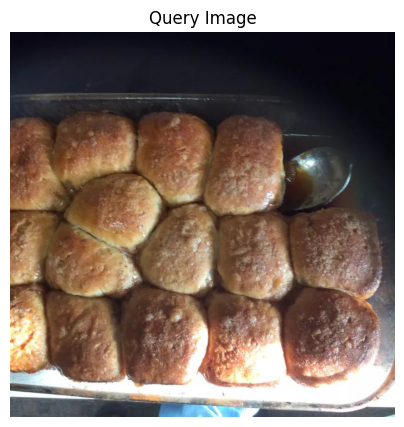

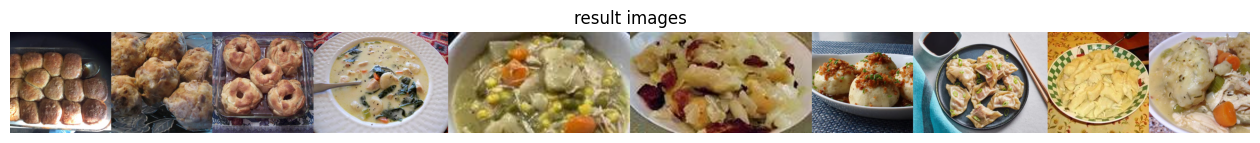

In [41]:
import numpy as np
import matplotlib.pyplot
from PIL import Image
import os
inp = 15
names = list(image_emdb.keys())
query = image_emdb[names[inp]]
print(names[inp])

distances = []
for i in range(len(names)):
    dot = np.dot(query, image_emdb[names[i]])
    norma = np.linalg.norm(query)
    normb = np.linalg.norm(image_emdb[names[i]])
    cos = dot / (norma * normb)
    distances.append(cos)
    #distances.append(np.linalg.norm(query-image_emdb[names[i]]))

#print(distances)
dist_indices = sorted(range(len(distances)), key=lambda k: distances[k])[-10:][::-1]
for i in dist_indices:
    print(names[i])

pred_image_names = []
    
def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        #img = image.load_img("test/"+file_names[idx]) #+file_names[idx])
        img = Image.open("/kaggle/input/testing/" + names[idx])
        pred_image_names.append(names[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image

query_image = Image.open("/kaggle/input/testing/" + names[inp])
results_image = get_concatenated_images(dist_indices, 400)

matplotlib.pyplot.figure(figsize = (5,5))
plt.axis('off')
plt.imshow(query_image)
matplotlib.pyplot.title("Query Image");
matplotlib.pyplot.figure(figsize = (16,12))
plt.axis('off')
plt.imshow(results_image)
matplotlib.pyplot.title("result images");


In [42]:
pred_image_names

['dumplings/22.jpg',
 'dumplings/44.jpg',
 'dumplings/41.jpg',
 'dumplings/29.jpg',
 'dumplings/39.jpg',
 'dumplings/35.jpg',
 'dumplings/17.jpg',
 'dumplings/7.jpg',
 'dumplings/59.jpg',
 'dumplings/18.jpg']

In [43]:
#Now compare ingredient similarity with these images
ingr_embd.keys()
len(query)
similar_images_ingr = []
for i in dist_indices:
    similar_images_ingr.append(pred[names.index('/'.join(names[i].split('/')))])


a = query
similarity_scores = []
for i in range(len(similar_images_ingr)):
    ingr = similar_images_ingr[i]
    dot = np.dot(a, ingr)
    norma = np.linalg.norm(a)
    normb = np.linalg.norm(ingr)
    cos = dot / (norma * normb)
    similarity_scores.append(cos)

similarity_scores.index(max(similarity_scores))
print(pred_image_names[similarity_scores.index(max(similarity_scores))])

top_recipe_idx = sorted(range(len(similarity_scores)), key=lambda i: similarity_scores[i])[-10:]
print("similar images")
for idx in top_recipe_idx[::-1]:
    print(pred_image_names[idx], similarity_scores[idx])
print(similar_images_ingr[0])
print(pred[names.index('dumplings/39.jpg')])

dumplings/22.jpg
similar images
dumplings/22.jpg 0.8517440436844012
dumplings/41.jpg 0.8514439028342191
dumplings/35.jpg 0.8509714180592332
dumplings/17.jpg 0.8504902849201688
dumplings/44.jpg 0.8495341372212788
dumplings/59.jpg 0.8494737360168024
dumplings/18.jpg 0.849228883805784
dumplings/7.jpg 0.848668423623516
dumplings/39.jpg 0.8468880702322129
dumplings/29.jpg 0.8432287930866579
[112.09168    0.         0.       ...  39.231888   0.         0.      ]
[109.87885     0.          0.        ...   5.4944844   0.
   0.       ]


In [44]:
print(similar_images_ingr[0])
print(pred[names.index('dumplings/39.jpg')])

[112.09168    0.         0.       ...  39.231888   0.         0.      ]
[109.87885     0.          0.        ...   5.4944844   0.
   0.       ]
